In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("adm_data.csv",index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91
399,312,103,3,3.5,4.0,8.78,0,0.67
400,333,117,4,5.0,4.0,9.66,1,0.95


In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
corr = df.corr()

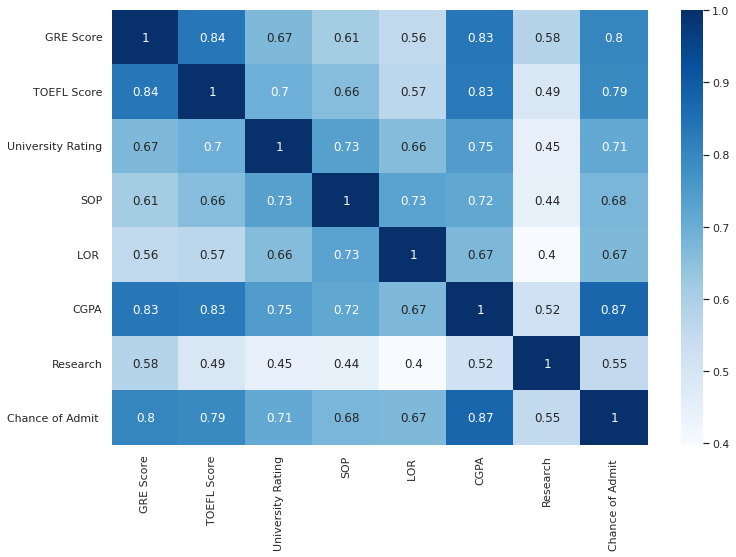

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr, annot = True, cmap = 'Blues')

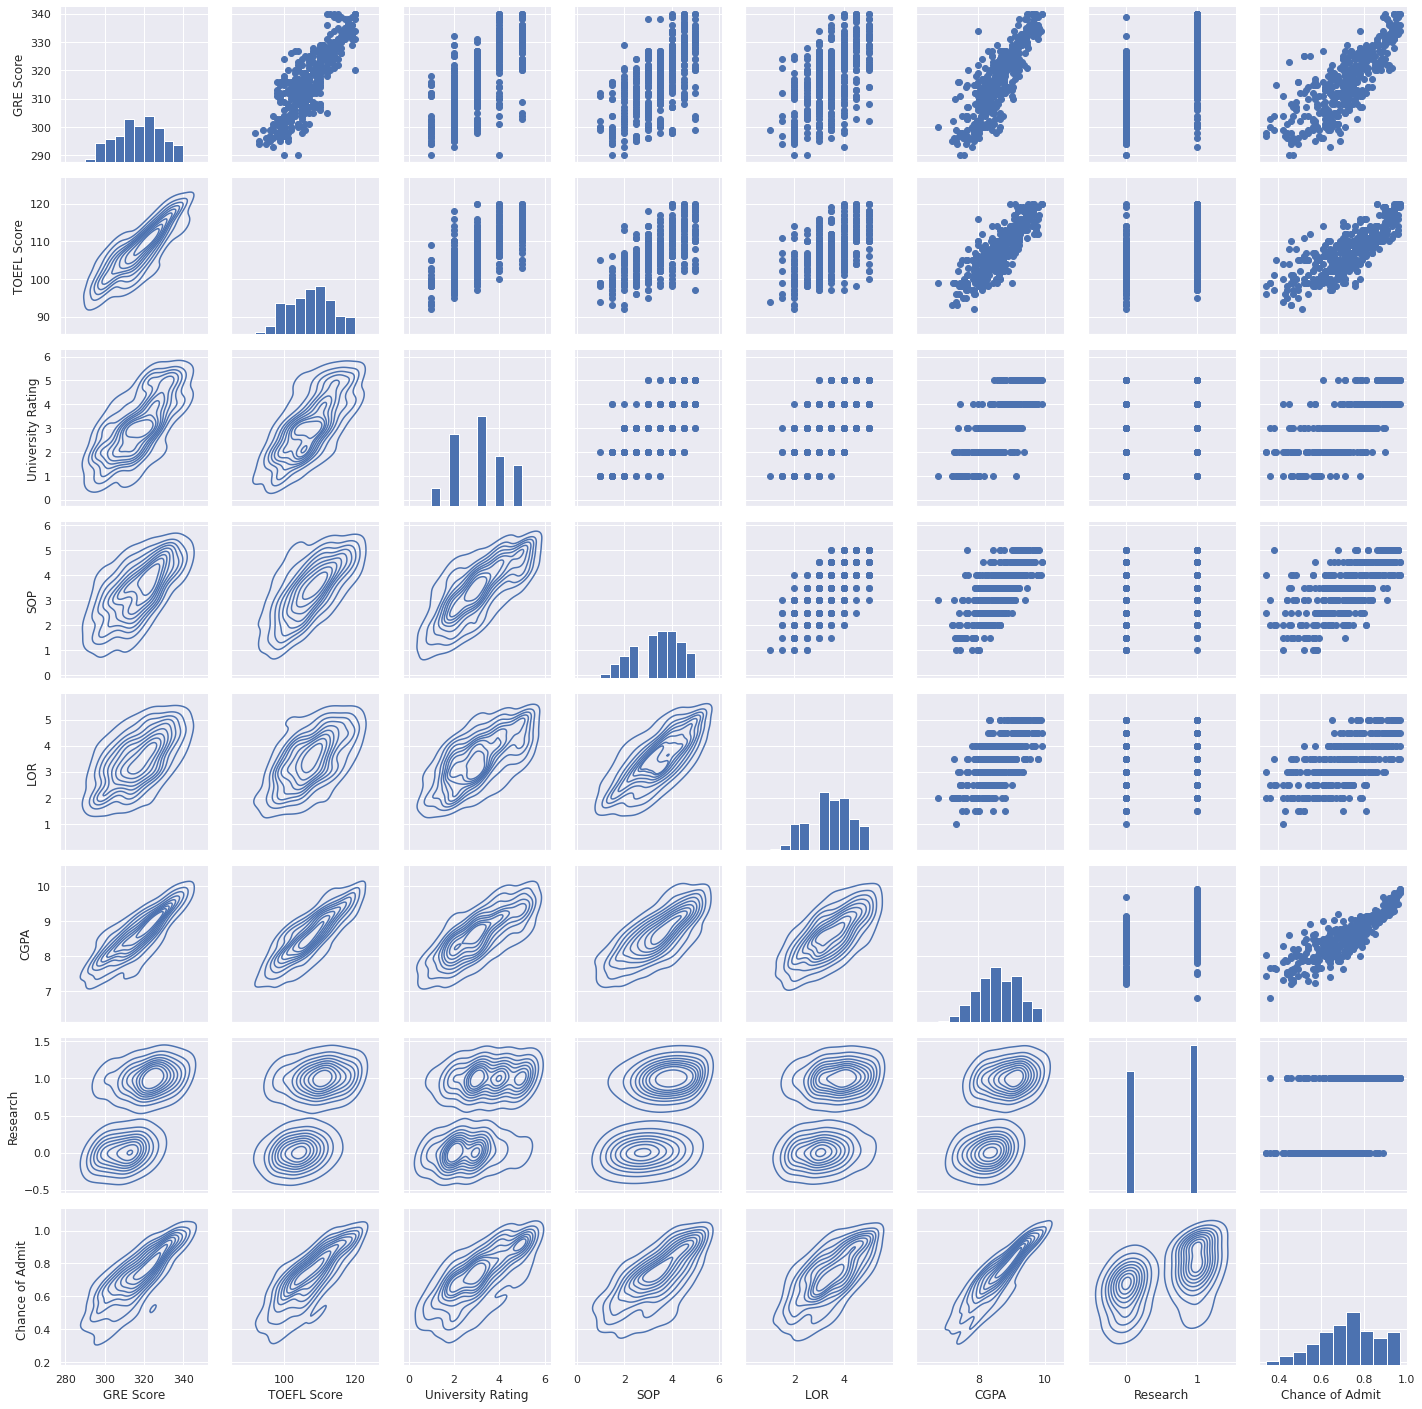

In [ ]:
# Map to upper,lower and diagonal
plot = sns.PairGrid(df)
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

In [ ]:
data = []
rate = df["Chance of Admit "].values
for x in rate:
  if (x >= 0.1 and x < 0.60):    
    data.append("low")
  elif (x >= 0.60 and x < 0.90):
    data.append("medium")
  elif (x >= 0.90 and x < 1.00):
    data.append("high")

In [ ]:
df['category'] = data
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,category
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,high
2,324,107,4,4.0,4.5,8.87,1,0.76,medium
3,316,104,3,3.0,3.5,8.00,1,0.72,medium
4,322,110,3,3.5,2.5,8.67,1,0.80,medium
5,314,103,2,2.0,3.0,8.21,0,0.65,medium
...,...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82,medium
397,325,107,3,3.0,3.5,9.11,1,0.84,medium
398,330,116,4,5.0,4.5,9.45,1,0.91,high
